In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This is the final assignment of supervised learning. In this notebook you will see different kind of methods used for the prediction of species based on leaf characteristics.



The data is retrieved from: http://archive.ics.uci.edu/ml/datasets/Leaf and contains specific features of leafs belonging to species. Here I try to test different kind of models, and check which method tackles this problem best.

In [125]:
data = pd.read_csv("leaf.csv", header = None)

In [126]:
data.shape

(340, 16)

There are 340 samples, with 14 characteristics, the first column is the label of the leaf.

In [127]:
# Changing column names
columnames = ["Class","Specimen Number","Eccentricity","Aspect Ratio","Elongation","Solidity","Stochastic Convexity","Isoperimetric Factor","Maximal Indentation Depth","Lobedness","Average Intensity","Average Contrast","Smoothness","Third moment","Uniformity","Entropy"]
data.columns = columnames

In [128]:
# This dataset contains 30 different species.
len(pd.unique(data["Class"]))

30

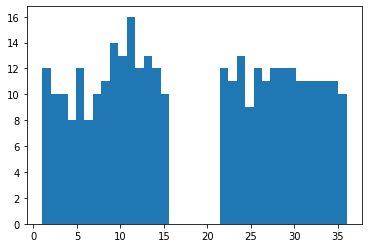

In [129]:
# Occurence of species
plt.hist(data["Class"], bins=36)
plt.show()

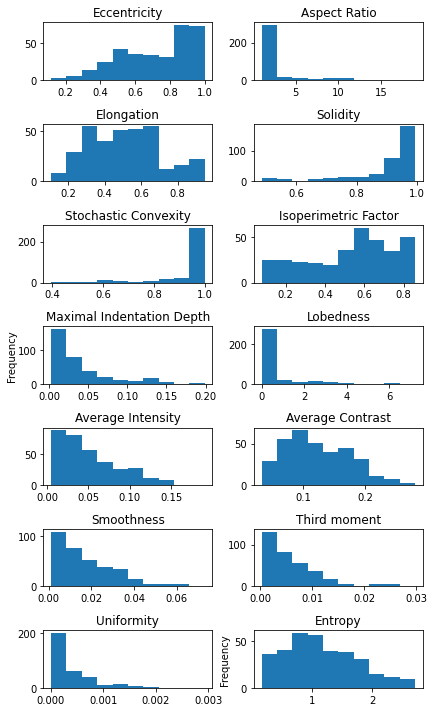

In [122]:
# Checking if the data is normally distributed
import seaborn as sns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(6,10))
fig.subplots_adjust(hspace=0.5)
for ax, i in zip(axes.flatten(),range(2,len(columnames))):
    ax.hist(data[columnames[i]])
    ax.set_title(columnames[i])
plt.tight_layout()
plt.ylabel("Frequency")
fig.text(0.001, 0.5, 'Frequency', va='center', rotation='vertical')
plt.show()

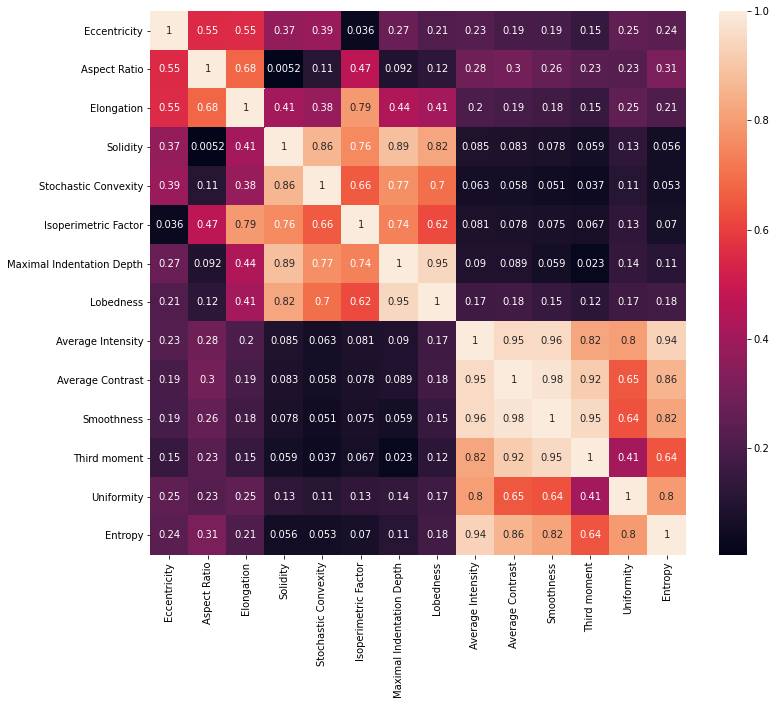

In [130]:
# Heatmap
c = data.iloc[:,2:].corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(c, annot=True)
plt.show()

What we can see here, is a correlation matrix of the features. We can clearly distingiush two cluster on the right side below and in the middle. We can see that solidy, stochastic Convexity, isoperimetric factor, maximal indentation depth and lobedness are strongly correlated to eachother. I can imagine that the isoperimetric factor and the solidity are correlated, the thickness, what I think is the maximal indentation depth is representing, contributes also to the solidity of a leaf so I can imagine these two are strongly correlated.  The denser the leaf the more solid it is. We can also see that the average intensity, average contrast, smoothness, third moment, uniformity and entropy are strongl correlated to eachother. Averege intensity and smoothness are corelated as they are incorperated in the calculations of the smoothness, as well as averege contrast and averae intensity. The the average contrast of average intensity is and are standard deviation and are therefore strongly correlated. 

In [132]:
labels = data.iloc[:,0]
features = data.iloc[:,2:]

In [133]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Eccentricity               340 non-null    float64
 1   Aspect Ratio               340 non-null    float64
 2   Elongation                 340 non-null    float64
 3   Solidity                   340 non-null    float64
 4   Stochastic Convexity       340 non-null    float64
 5   Isoperimetric Factor       340 non-null    float64
 6   Maximal Indentation Depth  340 non-null    float64
 7   Lobedness                  340 non-null    float64
 8   Average Intensity          340 non-null    float64
 9   Average Contrast           340 non-null    float64
 10  Smoothness                 340 non-null    float64
 11  Third moment               340 non-null    float64
 12  Uniformity                 340 non-null    float64
 13  Entropy                    340 non-null    float64

In [134]:
features.head()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [135]:
features.describe()

,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,0.719854,2.440210,0.513760,0.904158,0.943793,0.531234,0.037345,0.523845,0.051346,0.124535,0.017670,0.005928,0.000387,1.162630
std,0.208311,2.599043,0.195583,0.114639,0.115047,0.217532,0.038575,1.039639,0.035965,0.051860,0.013755,0.005294,0.000431,0.584854
min,0.117080,1.006600,0.107610,0.485490,0.396490,0.078376,0.002837,0.001464,0.005022,0.033415,0.001115,0.000229,0.000007,0.169400
25%,0.550623,1.211300,0.349623,0.890667,0.966230,0.346818,0.009521,0.016500,0.022843,0.083362,0.006901,0.002080,0.000102,0.718900
50%,0.763450,1.570750,0.501855,0.948130,0.992980,0.579160,0.023860,0.103615,0.042087,0.119375,0.014050,0.004447,0.000239,1.077450
75%,0.895097,2.343100,0.633373,0.976897,1.000000,0.700712,0.047834,0.416432,0.073046,0.163795,0.026127,0.008307,0.000516,1.554575
max,0.998710,19.038000,0.948340,0.993880,1.000000,0.858160,0.198980,7.206200,0.190670,0.280810,0.073089,0.029786,0.002936,2.708500


The code below was retrieved from https://github.com/fenna/student_BFVM19DATASC3/blob/main/W03_Ensemble_solution.ipynb

In [214]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

def evaluate(y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
    
      
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data")
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')

In [169]:
y = labels
X = features

In [170]:
# We have to normalize our data since it contains different kind of values

from sklearn.preprocessing import StandardScaler

def normalize(X):
    scalar = StandardScaler()
    scalar = scalar.fit(X)
    X = scalar.transform(X)
    return X

X = normalize(X)


In [171]:
# Here we are splitting our data, 70% is train data and 30% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [172]:
print(f'Train features shape: {X_train.shape}')
print(f'Train labels shape: {y_train.shape}')
print(f'Test features data shape: {X_test.shape}')
print(f'Test label shape: {y_test.shape}')

Train features shape: (238, 14)
Train labels shape: (238,)
Test features data shape: (102, 14)
Test label shape: (102,)


## Logistic Regression
First we are trying the logistic regression model on the data. Logistic regression is used when the dependent variable is categorical. This model is perfectly suitable for binary classification. However, our data contains 30 different outcomes. For this reason I would expect that will not perform optimal.

In [173]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state=1)
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [174]:
# Accuracy in train data
logistic_reg.score(X_train, y_train)

0.8361344537815126

In [175]:
# Accuracy in test data
logistic_reg.score(X_test, y_test)

0.7352941176470589

In [215]:
y_pred = logistic_reg.predict(X_test)
evaluate(y_test, y_pred)

[[5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0

test  acc: 0.7156862745098039
train acc: 0.8319327731092437


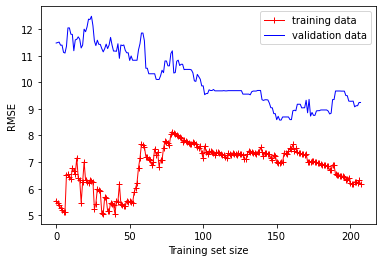

In [177]:
plot_learning_curves(logistic_reg, X_train, y_train, X_test, y_test)

This model is not performing well,the plot above shows pretty high RMSE scores. The error is big and should and should be way lower. Also the lines are not nicely placed on each other, the gap between these two lines are for certain not negligible. A f1 score of 0.70 is not very bad, but also not very good. 

## Decision Tree

A decision tree is used for classifying multiple classes, based on the features it makes a selection of classes answering in binary "yes" or "no".
I am expecting that this model suits well for this problem. In one of the first lessons this model was being used on classifying tomatoes species baced on specific characteristics, and this worked fine. I think this is a similar problem. 

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
tree_model = DecisionTreeClassifier(random_state=1)

In [195]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [220]:
# Accuracy of train and test data
print(f'Train: {tree_model.score(X_train,y_train)}')
print(f'Test: {tree_model.score(X_test,y_test)}')

Train: 1.0
Test: 0.5294117647058824


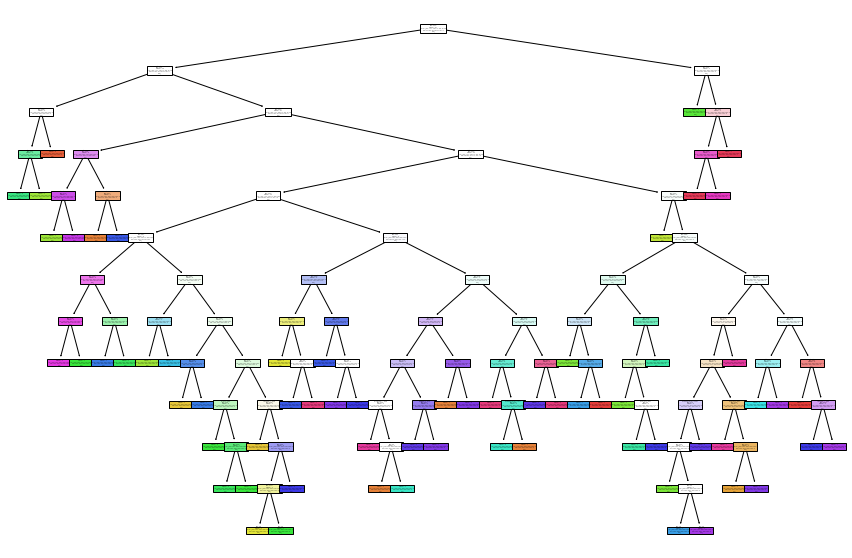

In [224]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(tree_model,filled=True,
              feature_names=columnames[2:],
              )  
plt.show()

Because the tree above is not very visible a text format has been created of this tree.

In [226]:
text_representation = tree.export_text(tree_model, feature_names=columnames[2:])
print(text_representation)

|--- Eccentricity <= 1.23
|   |--- Isoperimetric Factor <= -1.38
|   |   |--- Uniformity <= -0.36
|   |   |   |--- Solidity <= -2.59
|   |   |   |   |--- class: 11
|   |   |   |--- Solidity >  -2.59
|   |   |   |   |--- class: 6
|   |   |--- Uniformity >  -0.36
|   |   |   |--- class: 36
|   |--- Isoperimetric Factor >  -1.38
|   |   |--- Average Intensity <= -1.14
|   |   |   |--- Solidity <= 0.58
|   |   |   |   |--- Isoperimetric Factor <= -0.33
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- Isoperimetric Factor >  -0.33
|   |   |   |   |   |--- class: 29
|   |   |   |--- Solidity >  0.58
|   |   |   |   |--- Uniformity <= -0.82
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Uniformity >  -0.82
|   |   |   |   |   |--- class: 24
|   |   |--- Average Intensity >  -1.14
|   |   |   |--- Eccentricity <= 0.48
|   |   |   |   |--- Solidity <= 0.40
|   |   |   |   |   |--- Elongation <= -1.05
|   |   |   |   |   |   |--- Maximal Indentation Depth <= -0.11
|   |   |   |   |

In [227]:
# lets see how it performs on the test data

y_pred = tree_model.predict(X_test)
evaluate(y_test, y_pred)

[[1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0

test  acc: 0.5196078431372549
train acc: 0.9957983193277311


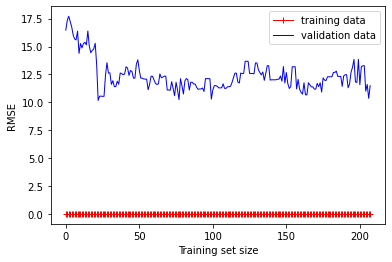

In [223]:
plot_learning_curves(tree_model, X_train, y_train, X_test, y_test)

What happens above is not very good, the training data shows a RMSE of 0.0 and the RMSE of the validation data is still very high which is not good. This shows signs of overfitting. You can also see this in the accuracy represented above this plot. It is not that high in the test data. This can be due to the size of the dataset, it has not a great number of samples. If this number increases a better model can be created. 

## Support Vector Machines (SVM)


### Radial Basis Function

In [258]:
from sklearn.svm import SVC

In [259]:
SVC_model = SVC(kernel="rbf",random_state=0)

In [260]:
SVC_model.fit(X_train, y_train)

SVC(random_state=0)

In [261]:
SVC_model.score(X_train,y_train)

0.6974789915966386

In [262]:
SVC_model.score(X_test,y_test)

0.5686274509803921

[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0

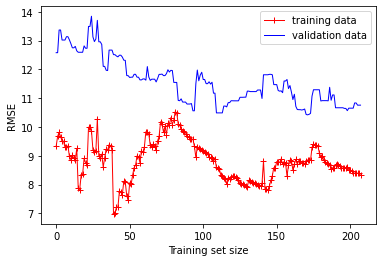

In [263]:
y_pred = SVC_model.predict(X_test)
evaluate(y_test,y_pred)
plot_learning_curves(SVC_model, X_train, y_train, X_test, y_test)

This model is not performing very well with an accuracy of 54%. Let's try it with a different kernel, below we will use the linear kernel.

### SVM Linear

Support vector machines divides classes 

In [247]:
SVC_model = SVC(kernel="linear",random_state=0)

In [248]:
SVC_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [249]:
SVC_model.score(X_train,y_train)

0.8865546218487395

In [250]:
SVC_model.score(X_test,y_test)

0.7254901960784313

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0

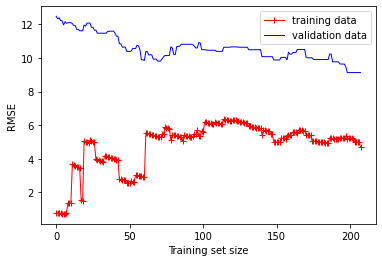

In [252]:
y_pred = SVC_model.predict(X_test)
evaluate(y_test,y_pred)
plot_learning_curves(SVC_model, X_train, y_train, X_test, y_test)

This model seems to perform slightly better than the logistic regression model. The RMSE curves are getting close to each other, but the RMSE error is still high overall. I think this is also due to the many classes present in the data set.

## Random Forest

Random forest makes a number of random decision trees, and the class with the most outcomes will be the final prediction. The decision tree did not work very well as shown before. I do not expect this to work well for the leaf data.

In [257]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier

In [278]:
rf = RandomForestClassifier(n_estimators = 300)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

[[3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 1 0 0 0 0 0

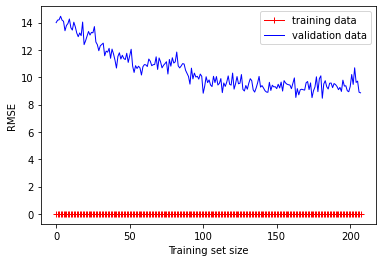

In [279]:
y_pred = rf.predict(X_test)
evaluate(y_test,y_pred)
plot_learning_curves(rf, X_train, y_train, X_test, y_test)

This model worked better than I expected. A nice parameter is the n_components, I increased this and it did get a higher accuracy for the test data. The RMSE curves are still very far away for each other.

## Naive Bayes

"A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem." https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

In [265]:
from sklearn.naive_bayes import GaussianNB

In [266]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

[[4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0

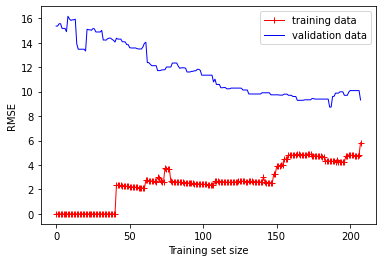

In [267]:
y_pred = gnb.predict(X_test)
evaluate(y_test, y_pred)
plot_learning_curves(gnb, X_train, y_train, X_test, y_test)

We seem to be used to this accuracy number, but now also the training data accuracy drops. This model predicts up to 71% of the leafs correctly. 

## Conclusion

No model did predict the data very well, the maximum accuracy was 75% this was yielded with the random forrest using 300 trees. I think a higher accuracy can be yielded increasing the number of trees however this is computational quite expensive.The SVM linear gives us 70 % accuracy and performed better than SVM rbf. I forget how many classes are present in this dataset, 30 classes is quite high. And with a model that predicts 75% accuracy is not bad nor good. I would've expected a greater accuracy. Maybe some species should be divided in subgroups to get a better accuracy and from there perform new analysis. In addition, deep learning algorithms could perform better.

